In [1]:
#import libraries
%matplotlib inline                   

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
def ecdf(data):            #cumulative distribution function
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x, y

In [3]:
year = 1980                          #GIR data from 1980
str_year = str(year)
url_gir = "https://www.pgatour.com/stats/stat.103."+str_year+".html"
html_gir = urlopen(url_gir)
soup_gir = BeautifulSoup(html_gir)
column_headers_gir = [th.getText() for th in soup_gir.findAll('tr', limit=2)[1].findAll('th')]
data_rows_gir = soup_gir.findAll('tr')[2:] 
player_data_gir = [[td.getText() for td in data_rows_gir[i].findAll('td')] for i in range(len(data_rows_gir))]
df_gir = pd.DataFrame(player_data_gir, columns=column_headers_gir)
df_gir.rename(columns={'%':'PERCENT GIR'},inplace=True)
df_gir = df_gir.drop(['RANK THIS WEEK','RANK LAST WEEK','GREENS HIT', "# HOLES", 'RELATIVE/PAR'],axis=1)
gir_array_1980 = np.array(df_gir['PERCENT GIR']).astype(float)

C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [4]:
year = 2017                  #GIR Data from 2017
str_year = str(year)
url_gir = "https://www.pgatour.com/stats/stat.103."+str_year+".html"
html_gir = urlopen(url_gir)
soup_gir = BeautifulSoup(html_gir)
column_headers_gir = [th.getText() for th in soup_gir.findAll('tr', limit=2)[1].findAll('th')]
data_rows_gir = soup_gir.findAll('tr')[2:] 
player_data_gir = [[td.getText() for td in data_rows_gir[i].findAll('td')] for i in range(len(data_rows_gir))]
df_gir = pd.DataFrame(player_data_gir, columns=column_headers_gir)
df_gir.rename(columns={'%':'PERCENT GIR'},inplace=True)
df_gir = df_gir.drop(['RANK THIS WEEK','RANK LAST WEEK','GREENS HIT', "# HOLES", 'RELATIVE/PAR'],axis=1)
gir_array_2017 = np.array(df_gir['PERCENT GIR']).astype(float)

C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


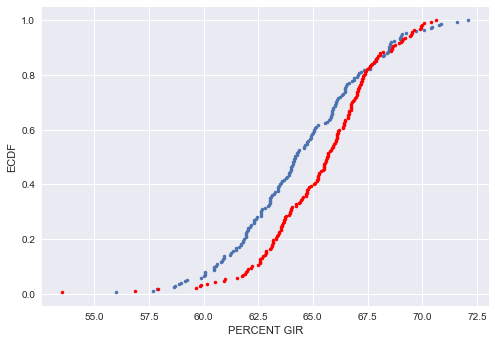

In [26]:
x, y = ecdf(gir_array_1980)          #plot of ecdf for gir in 2017 and 1980
x1, y1 = ecdf(gir_array_2017)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x1,y1,marker='.', linestyle='none',color='red')
plt.xlabel('PERCENT GIR')
plt.ylabel('ECDF')
plt.show()

In [14]:
diff_mean_gir = np.mean(gir_array_2017)-np.mean(gir_array_1980)     #Test statistic, diff of means
diff_mean_gir


0.9511834586466108

In [24]:
perm_list = []                       # p-value for null hypothesis that distributions the same
for _ in range(100000):
    gir_tot = np.concatenate([gir_array_1980,gir_array_2017])
    gir_tot_new = np.random.permutation(gir_tot)
    new_1980_gir = gir_tot_new[:len(gir_array_1980)]
    new_2017_gir = gir_tot_new[len(gir_array_2017):]
    diff_mean_gir_perm = np.mean(new_2017_gir)-np.mean(new_1980_gir)
    perm_list.append(diff_mean_gir_perm)
perm_array = np.array(perm_list)
print('p-value', np.count_nonzero(perm_array>diff_mean_gir)/100000 )

p-value 0.00099


In [18]:
year = 1980                            #repeat same steps for Driving accuracy in 1980 and 2017
str_year = str(year)
url_da = "https://www.pgatour.com/stats/stat.102."+str_year+".html"
html_da = urlopen(url_da)
soup_da = BeautifulSoup(html_da)
column_headers_da = [th.getText() for th in soup_da.findAll('tr', limit=2)[1].findAll('th')]
data_rows_da = soup_da.findAll('tr')[2:] 
player_data_da = [[td.getText() for td in data_rows_da[i].findAll('td')] for i in range(len(data_rows_da))]
df_da = pd.DataFrame(player_data_da, columns=column_headers_da)
df_da.rename(columns={'%':'PERCENT FAIRWAYS'},inplace=True)
df_da = df_da.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','FAIRWAYS HIT', 'POSSIBLE FAIRWAYS'],axis=1)
da_array_1980 = np.array(df_da['PERCENT FAIRWAYS']).astype(float)

C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [19]:
year = 2017
str_year = str(year)
url_da = "https://www.pgatour.com/stats/stat.102."+str_year+".html"
html_da = urlopen(url_da)
soup_da = BeautifulSoup(html_da)
column_headers_da = [th.getText() for th in soup_da.findAll('tr', limit=2)[1].findAll('th')]
data_rows_da = soup_da.findAll('tr')[2:] 
player_data_da = [[td.getText() for td in data_rows_da[i].findAll('td')] for i in range(len(data_rows_da))]
df_da = pd.DataFrame(player_data_da, columns=column_headers_da)
df_da.rename(columns={'%':'PERCENT FAIRWAYS'},inplace=True)
df_da = df_da.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','FAIRWAYS HIT', 'POSSIBLE FAIRWAYS'],axis=1)
da_array_2017 = np.array(df_da['PERCENT FAIRWAYS']).astype(float)

C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


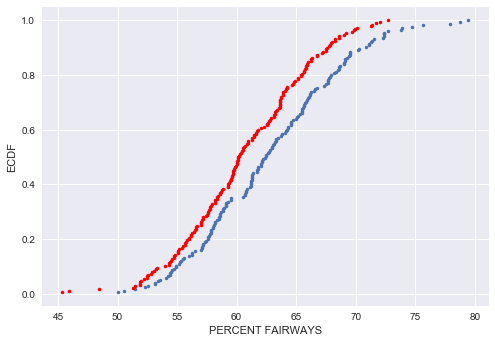

In [25]:
x2, y2 = ecdf(da_array_1980)
x3, y3 = ecdf(da_array_2017)
plt.plot(x2,y2,marker='.', linestyle='none')
plt.plot(x3,y3,marker='.', linestyle='none',color='red')
plt.xlabel('PERCENT FAIRWAYS')
plt.ylabel('ECDF')
plt.show()

In [21]:
diff_mean_da = np.mean(da_array_2017)-np.mean(da_array_1980)
diff_mean_da

-2.1652451127819532

In [23]:
perm_list_2 = []
for _ in range(100000):
    da_tot = np.concatenate([da_array_1980,da_array_2017])
    da_tot_new = np.random.permutation(da_tot)
    new_1980_da = da_tot_new[:len(da_array_1980)]
    new_2017_da = da_tot_new[len(da_array_2017):]
    diff_mean_da_perm = np.mean(new_2017_da)-np.mean(new_1980_da)
    perm_list.append(diff_mean_da_perm)
perm_array_2 = np.array(perm_list_2)
print('p-value', np.count_nonzero(perm_array_2<diff_mean_da)/100000)


p-value 0.0
